In [1]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [13]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [6]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [8]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,288.000000,285.579987,287.269989,288.000000,72423800.0,288.000000
2019-08-27,289.950012,286.029999,289.540009,286.869995,66668900.0,286.869995
2019-08-28,289.070007,285.250000,286.140015,288.890015,59696700.0,288.890015
2019-08-29,293.160004,290.609985,291.720001,292.579987,57899400.0,292.579987
2019-08-30,294.239990,291.420013,294.220001,292.450012,62901200.0,292.450012


In [9]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2019-08-30')

In [11]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [12]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


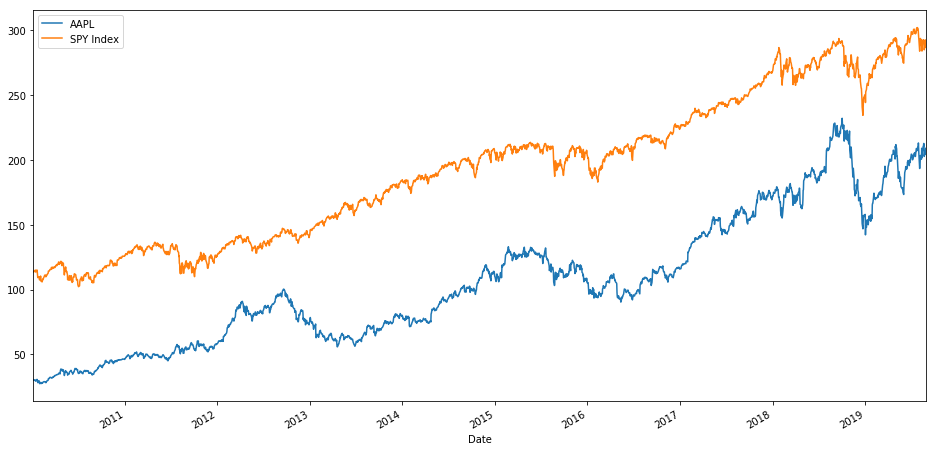

In [16]:
aapl['Close'].plot(label='AAPL',figsize=(16,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()
plt.show()

In [20]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

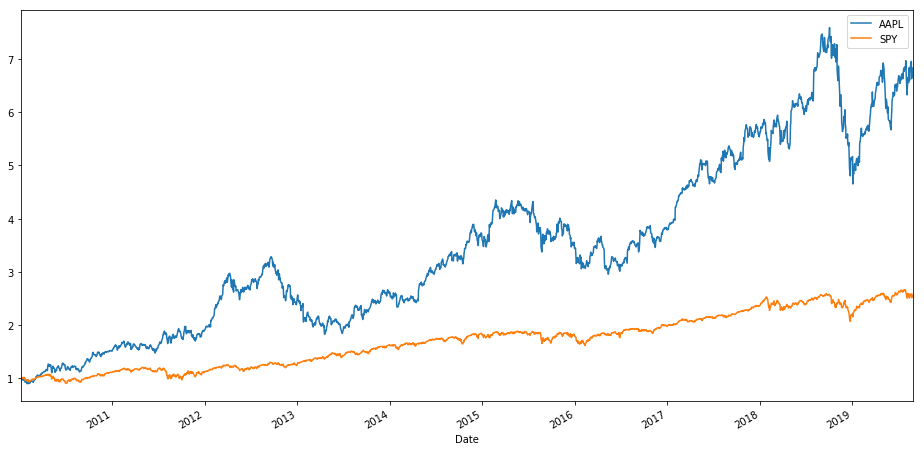

In [22]:
aapl['Cumulative'].plot(label='AAPL',figsize=(16,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [23]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

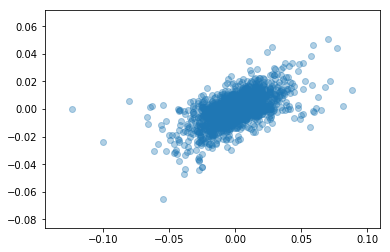

In [27]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'], alpha=0.35)

In [28]:
#not so much correlation

In [29]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                         spy_etf['Daily Return'].iloc[1:])

In [30]:
beta #high beta for correlation

0.34025264409108047

In [31]:
alpha

0.00011961895376917003

In [32]:
r_value

0.5929224007991658

In [33]:
p_value

8.998815504763645e-231

In [34]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [35]:
import numpy as np

In [37]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [38]:
noise

array([ 4.71451581e-05,  5.25942514e-04,  1.47468397e-04, ...,
        1.13199245e-03,  1.49991131e-03, -3.14028726e-04])

In [39]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

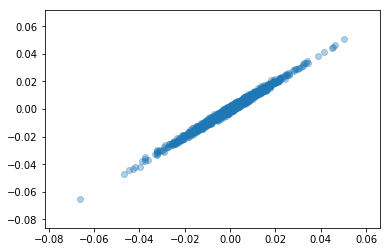

In [40]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=0.35)

In [41]:
#this is a correlation

In [42]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock,
                                                         spy_etf['Daily Return'].iloc[1:])

In [44]:
beta #almost one

0.9858586208246923

In [45]:
alpha #supposed to be small

-1.7590685509761964e-06

In [46]:
r_value

0.9941408106383306